### Importing required library

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

%matplotlib inline

### Understanding and reading dataset

In [3]:
# Reading dataset

df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [6]:
# Checking values in variables.

for var in df.columns[2:]:
    print(df[f"{var}"].value_counts())
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

0    5679
1    3561
Name: Converted, dtype: int64

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0   

In [7]:
# Some variables containt "Select", which is similar to NULL value.

# variables list which containt "Select"
var_containt_select = []
for var in df.columns[2:]:
    if "Select" in df[f"{var}"].value_counts():
        var_containt_select.append(var)

In [8]:
# Converting all "Select" to null value.

for var in var_containt_select:
    df[f"{var}"].replace("Select", np.nan, inplace=True)

In [9]:
# Checking for missing value in terms of percentge and removing variable which have more than 40%.

var_above_40_percen = df.isnull().sum()/len(df["Prospect ID"])*100
var_above_40_percen = var_above_40_percen[var_above_40_percen > 40].index

# Removing var_above_40_percen
df.drop(var_above_40_percen, axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# missing value in terms of percentge.

df.isnull().sum()/len(df["Prospect ID"])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [12]:
# Lead Source variable

df["Lead Source"].replace("google", "Google", inplace=True) # redundant value

# Converting all values, which have less than 1% to "others" values

others = df["Lead Source"].value_counts(normalize=True)
others = others[others < 0.01]

for value in others.index:
    df["Lead Source"].replace(value, "Other", inplace=True)

In [13]:
df["Lead Source"].mode()[0]

'Google'

In [14]:
# Imputting null value with mode of the varaible.

df["Lead Source"].fillna(df["Lead Source"].mode()[0], inplace=True)

In [15]:
# TotalVisits can be imputed with median of the variable.

df["TotalVisits"].fillna(df["TotalVisits"].median(), inplace=True)

In [16]:
# Page Views Per Visit can be imputed with median of the variable.

df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(), inplace=True)

In [17]:
# Last Activity can be imputed with the mode.

df["Last Activity"].fillna(df["Last Activity"].mode()[0], inplace=True)

In [18]:
# Country variable have more than 25% null value, impute the null value with another category "unknown" value.

df["Country"].fillna("unknown", inplace=True)

In [19]:
# Specialization variable have more than 36% null value, impute the null value with another category "unknown" value.

df.Specialization.fillna("unknown", inplace=True)

In [20]:
# "What is your current occupation" variable have more than 29% null value, impute the null value with another category "unknown" value.

df["What is your current occupation"].fillna("unknown",inplace=True)

In [21]:
# Converting the "Flexibility & Convenience" to "Other", bcz, "Flexibility & Convenience" have less value in data.

df["What matters most to you in choosing a course"].replace("Flexibility & Convenience", "Other", inplace=True)

In [22]:
# "What matters most to you in choosing a course" have more than 29% null value. converting all null value to "unknown" category.

df["What matters most to you in choosing a course"].fillna('unknown', inplace=True)

In [23]:
# Tags variavle have more than 36% null value. converting all null value to "unknown" category.

df.Tags.fillna("unknown", inplace=True)

In [24]:
# City variavle have more than 39% null value. converting all null value to "unknown" category.

df.City.fillna("unknown",inplace=True)

In [25]:
# Checkiing mising value again.

df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [26]:
# Converting all values, which have value less than 1% to "Other" category values. this is done to reduce the categorys in variables.

multiple_category_var = ["Lead Origin", "Last Activity", "Country", "Specialization", "What is your current occupation", "Tags", "Last Notable Activity"]

for var in multiple_category_var:
    Other = df[f"{var}"].value_counts(normalize=True)
    Other = Other[Other < 0.01]
    
    for value in Other.index:
        df[f"{var}"].replace(value, "Other", inplace=True)

In [27]:
# Checking above process.

for var in multiple_category_var:
    print(df[f"{var}"].value_counts())
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Other                        56
Name: Lead Origin, dtype: int64

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Other                         112
Unreachable                    93
Name: Last Activity, dtype: int64

India      6492
unknown    2466
Other       282
Name: Country, dtype: int64

unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel an

In [28]:
# Dropping redundant column.

df.drop(["Prospect ID", "Newspaper Article"], axis=1, inplace=True)

### EDA of Dataset

In [29]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,No,No,unknown,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,No,No,unknown,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [30]:
df.shape

(9240, 28)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [32]:
# Dividing the dataset in terms of numeric and category variables.

num_var = ["Converted", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
category_var = []

for var in df.columns[1:]:
    if var not in num_var:
        category_var.append(var)

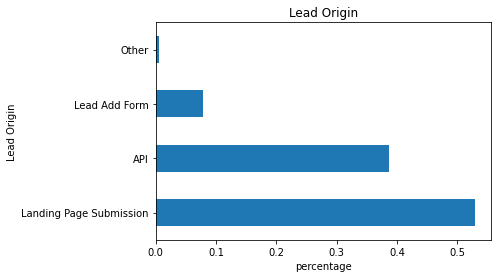

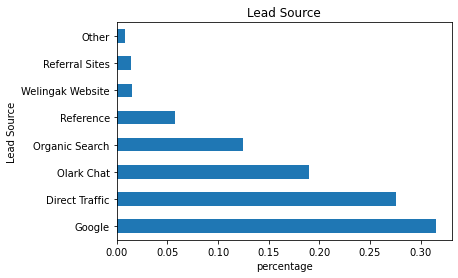

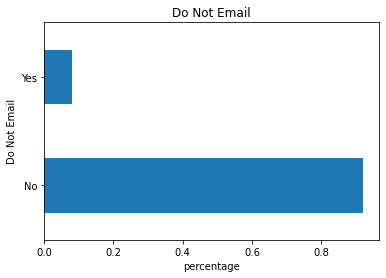

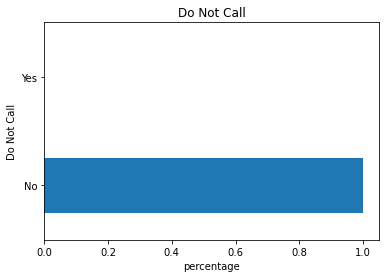

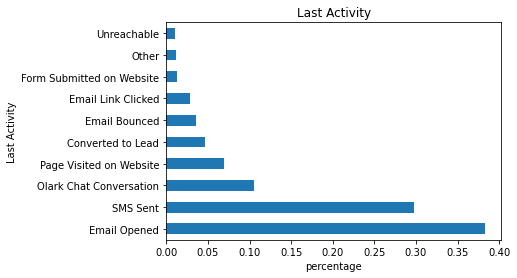

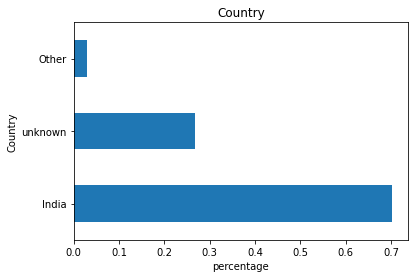

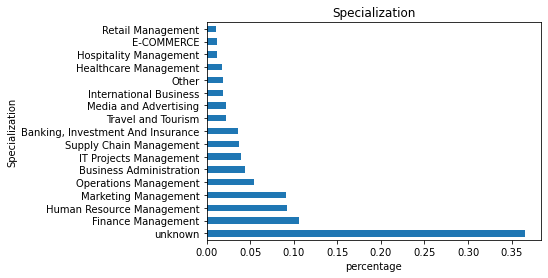

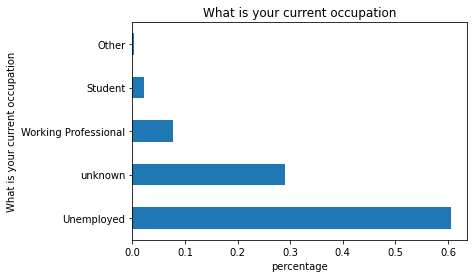

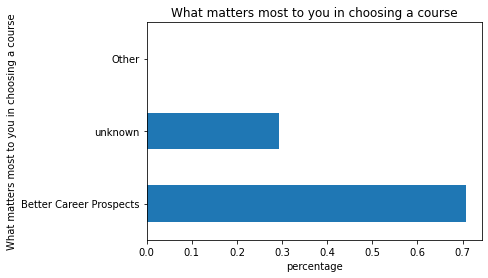

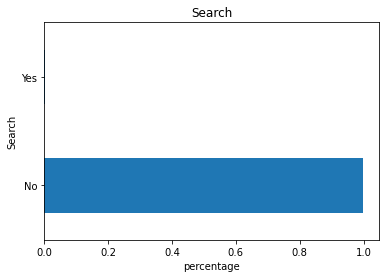

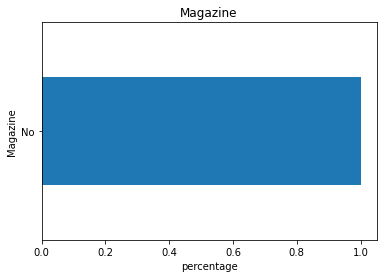

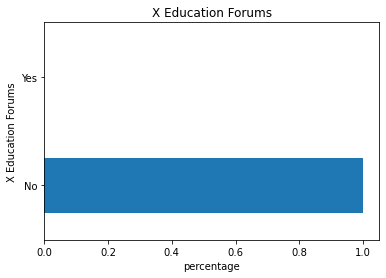

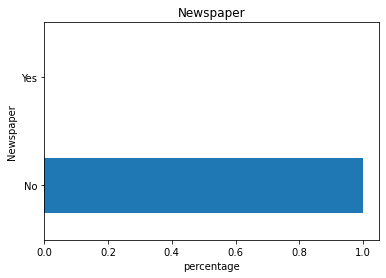

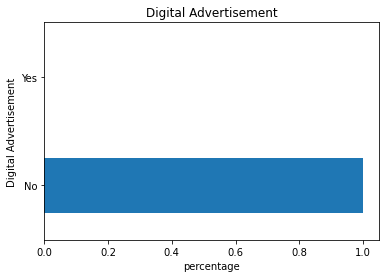

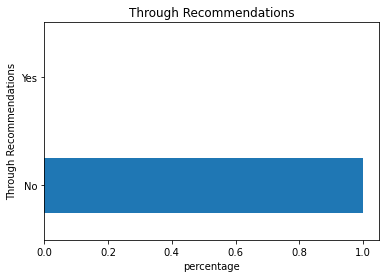

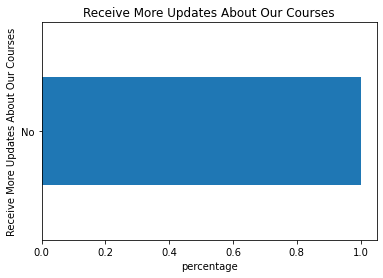

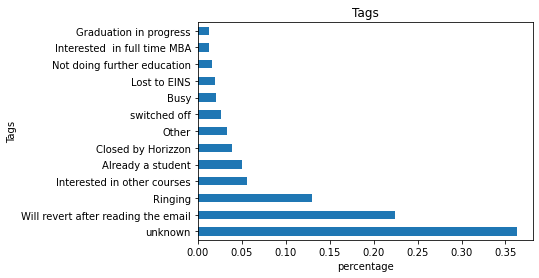

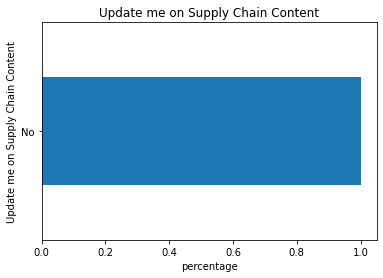

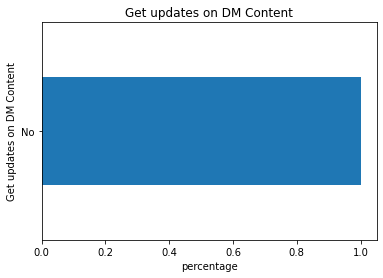

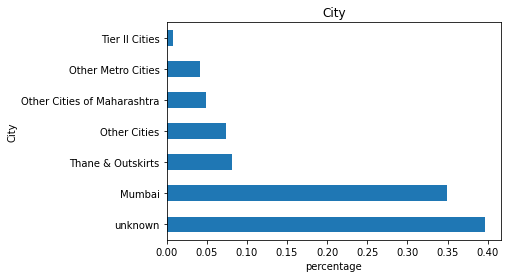

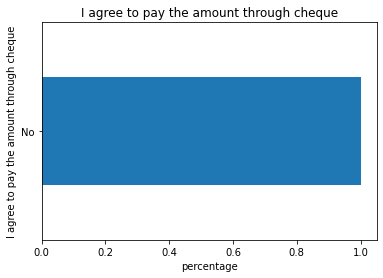

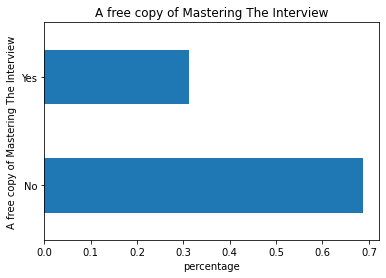

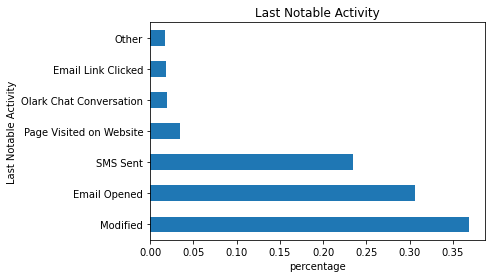

In [33]:
# Analysis of category variables

def var_analysis(variable):
    df[f"{variable}"].value_counts(normalize=True).plot.barh()
    plt.title(f"{variable}")
    plt.xlabel("percentage")
    plt.ylabel(f"{variable}")
    plt.show()
    
for variable in category_var:
    var_analysis(variable)

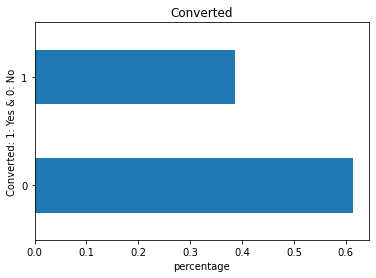

In [34]:
# Bar graph of Converted target variable.

df["Converted"].value_counts(normalize=True).plot.barh()
plt.title("Converted")
plt.xlabel("percentage")
plt.ylabel("Converted: 1: Yes & 0: No")
plt.show()

In [35]:
continue_var = df[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]

In [36]:
continue_var.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


#### EDA Summary

- Around 40% of the leads converted.
- In "Lead Origin", "Landing Page Submission" is more than 50%, the second highest is through "API".
- In "Lead Source", "Google" is the highest through which leads search on, second and third highest is "Direct  trffic" & "Olark Chat" respectivly.
- More than 80% leads opted for "Email contact" & around 95% opted for "call contact".
- In "Last Activity", around 40% opened email and around 30% SMS Sent.
- Aroud 70% of leads are from country "India", near 25% country are "unknown" and rest 5% are others.
- In "Specialization" more than 35% data is "unknown", near 10% are from "Finance Management".
- Near 60% of leads are unemployed, around 25% are unnown, around 10% are working professional and near 5% are student.
- Everyone in this dataset opted for "no" to this variable "I agree to pay the amount through cheque".
- Near 70% of leads choosing this course for "Better Career Prospects".

### Data Preparation

In [37]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,No,No,unknown,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,No,No,unknown,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [38]:
# list of Advertisements.

adds = [var for var in df.columns[15:19]]
adds

['Magazine', 'X Education Forums', 'Newspaper', 'Digital Advertisement']

In [39]:
# creating one column Advertisements.

df["Advertisement"] = df["Digital Advertisement"]

In [40]:
# Dropping list of Advertisement from the data.

df.drop(adds, axis=1, inplace=True)

In [41]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Advertisement
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,Interested in other courses,No,No,unknown,No,No,Modified,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,Unemployed,Better Career Prospects,No,No,No,Ringing,No,No,unknown,No,No,Email Opened,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened,No
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,Ringing,No,No,Mumbai,No,No,Modified,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Unemployed,Better Career Prospects,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified,No


In [42]:
# All variables containt "Yes" and "No" values.

var_list = []

for var in df.columns[1:]:
    if ("Yes" and "No") in df[f"{var}"].value_counts():
        var_list.append(var)

In [43]:
#Define the map function.
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})
    
# Applying above function to var_list to convert 'Yes': 1 and  "No": 0.
df[var_list] = df[var_list].apply(binary_map)

In [44]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Advertisement
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,Unemployed,Better Career Prospects,0,0,0,Interested in other courses,0,0,unknown,0,0,Modified,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,unknown,Unemployed,Better Career Prospects,0,0,0,Ringing,0,0,unknown,0,0,Email Opened,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,Ringing,0,0,Mumbai,0,0,Modified,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,unknown,Unemployed,Better Career Prospects,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified,0


In [45]:
# Creating category list of variable which required dummies variables.

category_list = []

for var in df.columns[1:]:
    if (0 and 1) not in df[f"{var}"].value_counts():
        category_list.append(var)

In [46]:
def dummies_encoding(var):
    global df
    dummies = pd.get_dummies(df[f"{var}"], prefix=f"{var}", drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df

for var in category_list:
    dummies_encoding(var)

In [47]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,Unemployed,Better Career Prospects,0,0,0,Interested in other courses,0,0,unknown,0,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,unknown,Unemployed,Better Career Prospects,0,0,0,Ringing,0,0,unknown,0,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,Ringing,0,0,Mumbai,0,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,unknown,Unemployed,Better Career Prospects,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [48]:
# After dummies encoding variable, dropping category_list variable.

df.drop(category_list, axis=1, inplace=True)

In [49]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Lead Number                                            9240 non-null   int64  
 1   Do Not Email                                           9240 non-null   int64  
 2   Do Not Call                                            9240 non-null   int64  
 3   Converted                                              9240 non-null   int64  
 4   TotalVisits                                            9240 non-null   float64
 5   Total Time Spent on Website                            9240 non-null   int64  
 6   Page Views Per Visit                                   9240 non-null   float64
 7   Search                                                 9240 non-null   int64  
 8   Through Recommendations                         

In [51]:
# Creating list of continue numeric variable.

continue_var = df[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]

In [52]:
continue_var.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


#### Here, TotalVisits and "Page Views per visit" variable seem to outlier.

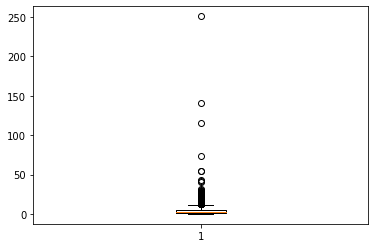

In [53]:
# Looking for outlier.

plt.boxplot(df["TotalVisits"])
plt.show()

In [54]:
# Removing outlier.

df = df[df["TotalVisits"] < 50]

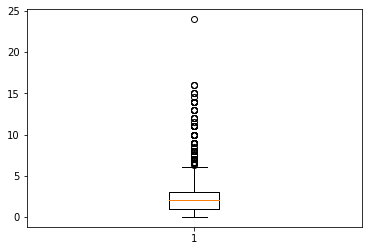

In [55]:
# Looking for outlier.

plt.boxplot(df["Page Views Per Visit"])
plt.show()

In [56]:
# Removing outlier.

df = df[df["Page Views Per Visit"] < 15]

In [57]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
# putting feature or independent variable to X.

X = df.drop(["Converted", "Lead Number"], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
# putting response or dependent variable to y.

y = df["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
scaler = StandardScaler()

X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Advertisement,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4679,0,0,-0.400891,-0.435832,-0.173688,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4328,0,0,0.192226,-0.586526,-0.505529,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3650,0,0,-0.697450,-0.394074,-0.668973,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1052,0,0,-0.104333,1.741052,0.321596,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8706,1,0,-0.994008,-0.893359,-1.164257,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [62]:
# checking the lead rate.

lead = round((sum(df["Converted"])/len(df["Converted"].index))*100,2)
lead

38.56

### Looking at Correlation

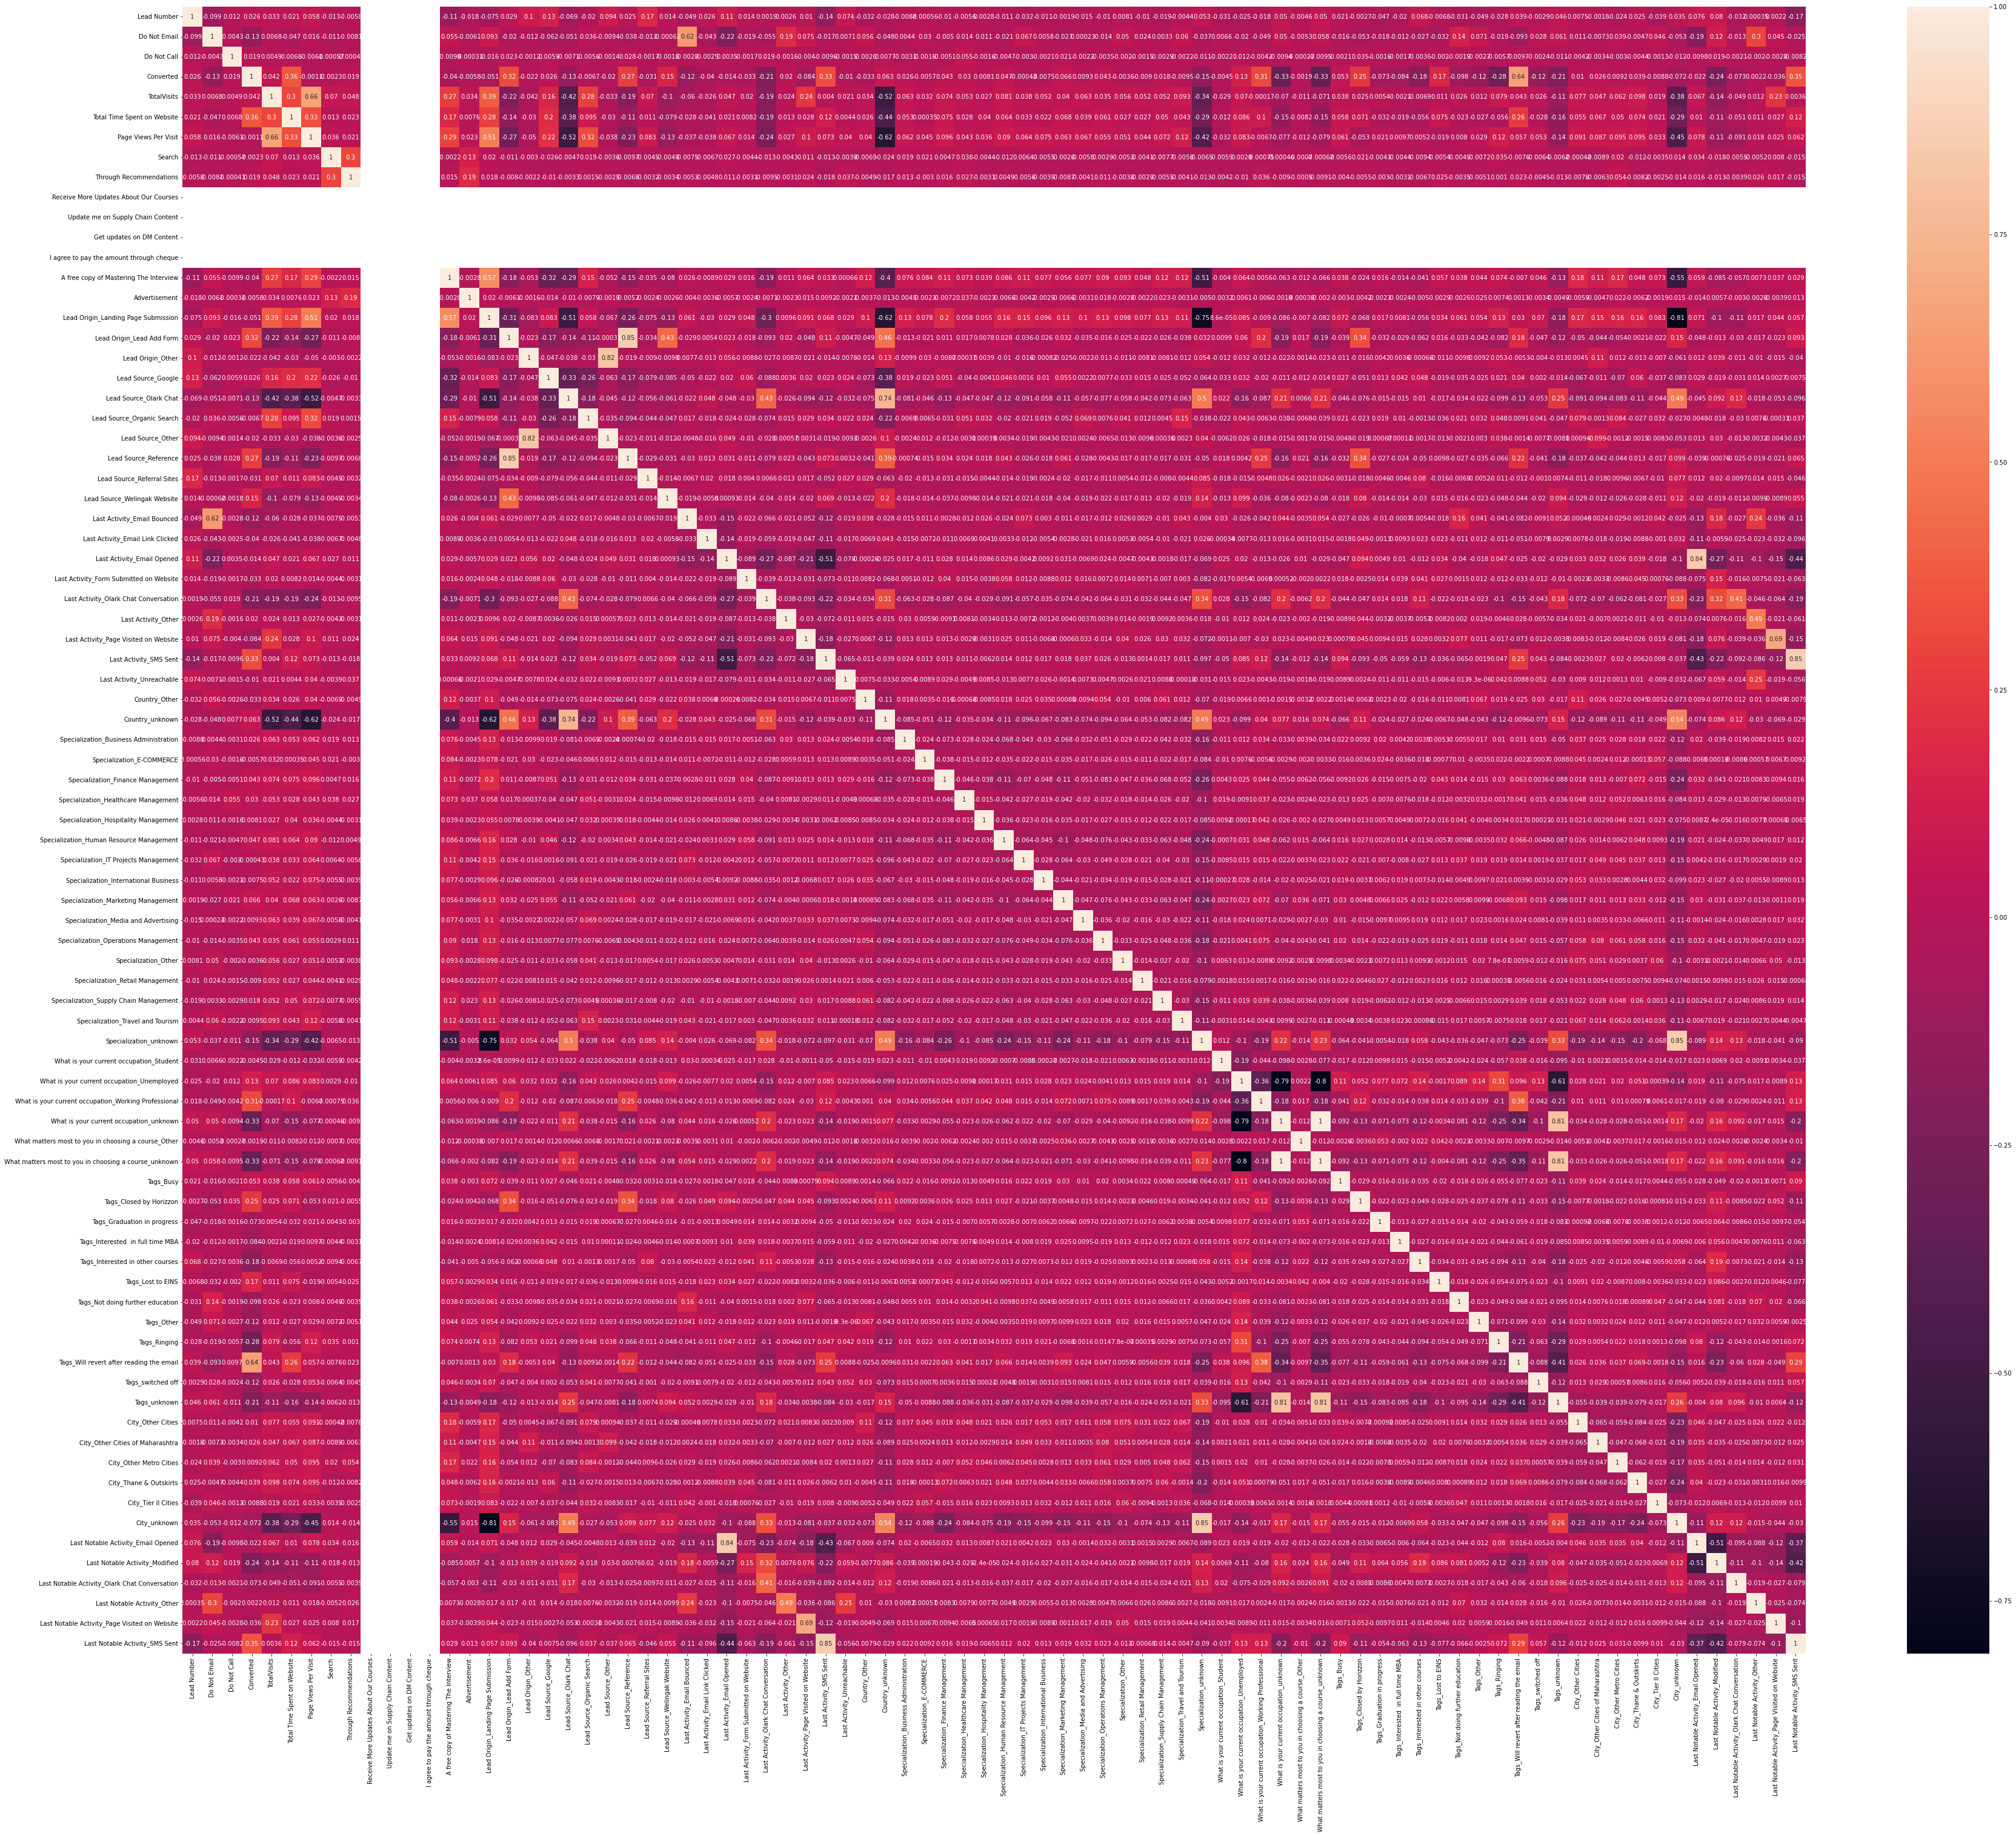

In [63]:
# correlation Matrix.

plt.figure(figsize=(60,50))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Building first model with all the variables.

In [64]:
# Logistic regression model.

log_m1 = sm.GLM(y_train, (sm.add_constant(X_train)), families = sm.families.Binomial())
log_m1.fit().summary()

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6381
Model Family:                Gaussian   Df Model:                           76
Link Function:               identity   Scale:                        0.059041
Method:                          IRLS   Log-Likelihood:                 11.771
Date:                Tue, 18 Apr 2023   Deviance:                       376.74
Time:                        13:18:27   Pearson chi2:                     377.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9524
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.0238      0.066      0.359      0.720      -0.106       0.154
Do Not Email                                             -0.0603      0.015     -3.937      0.000      -0.090      -0.030
Do Not Call                                               0.0427      0.244      0.175      0.861      -0.435       0.521
TotalVisits                                               0.0082      0.004      1.839      0.066      -0.001       0.017
Total Time Spent on Website                               0.0733      0.004     19.971      0.000       0.066       0.080
Page Views Per Visit                                     -0.0144      0.005     -2.936      0.003      -0.024      -0.005
Search                                                    0.0643      0.082      0.786      0.432      -0.096       0.225
Through Recommendations                               -4.903e-05      0.129     -0.000      1.000      -0.252       0.252
Receive More Updates About Our Courses                -7.901e-16    1.5e-15     -0.525      0.599   -3.74e-15    2.16e-15
Update me on Supply Chain Content                      4.723e-16   6.23e-16      0.759      0.448   -7.48e-16    1.69e-15
Get updates on DM Content                              1.269e-16   1.42e-15      0.089      0.929   -2.66e-15    2.92e-15
I agree to pay the amount through cheque              -4.114e-16   6.46e-16     -0.637      0.524   -1.68e-15    8.54e-16
A free copy of Mastering The Interview                   -0.0086      0.010     -0.863      0.388      -0.028       0.011
Advertisement                                             0.0038      0.173      0.022      0.983      -0.336       0.343
Lead Origin_Landing Page Submission                      -0.0244      0.014     -1.804      0.071      -0.051       0.002
Lead Origin_Lead Add Form                                 0.0240      0.052      0.465      0.642      -0.077       0.125
Lead Origin_Other                                        -0.0931      0.073     -1.273      0.203      -0.236       0.050
Lead Source_Google                                        0.0194      0.010      1.855      0.064      -0.001       0.040
Lead Source_Olark Chat                                    0.0127      0.024      0.538      0.590      -0.034       0.059
Lead Source_Organic Search                                0.0308      0.012      2.630      0.009       0.008       0.054
Lead Source_Other                                         0.0452      0.055      0.822      0.411      -0.063       0.153
Lead Source_Reference                                     0.0063      0.050      0.125      0.900      -0.093       0.105
Lead Source_Referral Sites       

#### Feature Selection Using RFE

In [65]:
# Logistic Regression model function.

log_reg = LogisticRegression()

In [66]:
# Recurssive Feature Elimination with 25 variables as output.

rfe = RFE(log_reg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 52),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Search', False, 4),
 ('Through Recommendations', False, 45),
 ('Receive More Updates About Our Courses', False, 56),
 ('Update me on Supply Chain Content', False, 55),
 ('Get updates on DM Content', False, 54),
 ('I agree to pay the amount through cheque', False, 53),
 ('A free copy of Mastering The Interview', False, 20),
 ('Advertisement', False, 49),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Other', False, 19),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Emai

In [68]:
col = X_train.columns[rfe.support_]

#### Creating another model with RFE variables.

In [69]:
X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1121.0
Date:                Tue, 18 Apr 2023   Deviance:                       2242.0
Time:                        13:18:31   Pearson chi2:                 1.18e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6288
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -3.7690      0.343    -10.998      0.000      -4.441      -3.097
Do Not Email                                             -1.0907      0.301     -3.623      0.000      -1.681      -0.501
Total Time Spent on Website                               1.0478      0.065     16.244      0.000       0.921       1.174
Lead Origin_Other                                        -1.3353      0.673     -1.985      0.047      -2.654      -0.017
Lead Source_Welingak Website                              3.2473      1.028      3.160      0.002       1.233       5.262
Last Activity_Email Bounced                              -0.9701      0.562     -1.725      0.084      -2.072       0.132
Last Activity_SMS Sent                                    2.0229      0.131     15.488      0.000       1.767       2.279
Country_unknown                                           1.0352      0.154      6.724      0.000       0.733       1.337
Specialization_Hospitality Management                    -1.2070      0.554     -2.180      0.029      -2.292      -0.122
Specialization_Travel and Tourism                        -1.0436      0.448     -2.331      0.020      -1.921      -0.166
What is your current occupation_Working Professional      0.6591      0.399      1.653      0.098      -0.122       1.440
What is your current occupation_unknown                  21.7611   5.61e+04      0.000      1.000    -1.1e+05     1.1e+05
What matters most to you in choosing a course_unknown   -24.4574   5.61e+04     -0.000      1.000    -1.1e+05     1.1e+05
Tags_Busy                                                 3.1089      0.405      7.683      0.000       2.316       3.902
Tags_Closed by Horizzon                                   8.8845      0.800     11.112      0.000       7.317      10.452
Tags_Interested in other courses                          0.2698      0.509      0.530      0.596      -0.728       1.268
Tags_Lost to EINS                                         9.2208      0.735     12.542      0.000       7.780      10.662
Tags_Not doing further education                        -21.0166   1.83e+04     -0.001      0.999    -3.6e+04    3.59e+04
Tags_Other                                                0.1597      0.480      0.333      0.739      -0.780       1.100
Tags_Ringing                                             -0.9668      0.403     -2.400      0.016      -1.756      -0.177
Tags_Will revert after reading the email                  6.7107      0.381     17.633      0.000       5.965       7.457
Tags_switched off                                        -1.5221      0.693     -2.196      0.028      -2.881      -0.163
Tags_unknown                     

#### p-value is above 5% of some of the variables. so, dropping highest p-value variables.

In [70]:
col = col.drop("What matters most to you in choosing a course_unknown", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other'],
      dtype='object')

In [71]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.3
Date:                Tue, 18 Apr 2023   Deviance:                       2248.6
Time:                        13:18:32   Pearson chi2:                 1.22e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6284
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7649      0.343    -10.986      0.000      -4.437      -3.093
Do Not Email                                            -1.1442      0.299     -3.830      0.000      -1.730      -0.559
Total Time Spent on Website                              1.0474      0.064     16.265      0.000       0.921       1.174
Lead Origin_Other                                       -1.3264      0.674     -1.969      0.049      -2.647      -0.006
Lead Source_Welingak Website                             3.2853      1.028      3.196      0.001       1.271       5.300
Last Activity_Email Bounced                             -1.0030      0.551     -1.822      0.069      -2.082       0.076
Last Activity_SMS Sent                                   2.0257      0.130     15.544      0.000       1.770       2.281
Country_unknown                                          1.0541      0.154      6.863      0.000       0.753       1.355
Specialization_Hospitality Management                   -1.2008      0.554     -2.167      0.030      -2.287      -0.115
Specialization_Travel and Tourism                       -1.0302      0.449     -2.292      0.022      -1.911      -0.149
What is your current occupation_Working Professional     0.6604      0.399      1.655      0.098      -0.122       1.442
What is your current occupation_unknown                 -2.6560      0.156    -16.993      0.000      -2.962      -2.350
Tags_Busy                                                3.1119      0.405      7.687      0.000       2.318       3.905
Tags_Closed by Horizzon                                  8.8926      0.800     11.121      0.000       7.325      10.460
Tags_Interested in other courses                         0.2755      0.509      0.541      0.589      -0.723       1.274
Tags_Lost to EINS                                        9.2139      0.736     12.512      0.000       7.771      10.657
Tags_Not doing further education                       -21.0055   1.83e+04     -0.001      0.999   -3.59e+04    3.58e+04
Tags_Other                                               0.1603      0.480      0.334      0.738      -0.780       1.101
Tags_Ringing                                            -0.9727      0.403     -2.415      0.016      -1.762      -0.183
Tags_Will revert after reading the email                 6.7150      0.381     17.633      0.000       5.969       7.461
Tags_switched off                                       -1.5252      0.693     -2.200      0.028      -2.884      -0.166
Tags_unknown                                             4.1055      0.361     11.375      0.000       3.398       4.813
Last Notable Activity_Modified                          -1

#### dropping highest p-value variables.

In [72]:
col = col.drop("Tags_Not doing further education", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other'],
      dtype='object')

In [73]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1125.6
Date:                Tue, 18 Apr 2023   Deviance:                       2251.2
Time:                        13:18:32   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6283
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9072      0.340    -11.489      0.000      -4.574      -3.241
Do Not Email                                            -1.1505      0.298     -3.857      0.000      -1.735      -0.566
Total Time Spent on Website                              1.0486      0.064     16.280      0.000       0.922       1.175
Lead Origin_Other                                       -1.3279      0.674     -1.970      0.049      -2.649      -0.006
Lead Source_Welingak Website                             3.2845      1.028      3.195      0.001       1.270       5.299
Last Activity_Email Bounced                             -1.0029      0.549     -1.827      0.068      -2.079       0.073
Last Activity_SMS Sent                                   2.0249      0.130     15.546      0.000       1.770       2.280
Country_unknown                                          1.0577      0.154      6.883      0.000       0.757       1.359
Specialization_Hospitality Management                   -1.2035      0.553     -2.175      0.030      -2.288      -0.119
Specialization_Travel and Tourism                       -1.0295      0.450     -2.290      0.022      -1.911      -0.148
What is your current occupation_Working Professional     0.6617      0.399      1.658      0.097      -0.120       1.444
What is your current occupation_unknown                 -2.6561      0.156    -16.992      0.000      -2.962      -2.350
Tags_Busy                                                3.2551      0.402      8.092      0.000       2.467       4.044
Tags_Closed by Horizzon                                  9.0347      0.799     11.314      0.000       7.470      10.600
Tags_Interested in other courses                         0.4175      0.507      0.823      0.411      -0.577       1.412
Tags_Lost to EINS                                        9.3572      0.735     12.728      0.000       7.916      10.798
Tags_Other                                               0.3030      0.478      0.634      0.526      -0.633       1.239
Tags_Ringing                                            -0.8309      0.400     -2.075      0.038      -1.616      -0.046
Tags_Will revert after reading the email                 6.8578      0.378     18.126      0.000       6.116       7.599
Tags_switched off                                       -1.3829      0.692     -1.999      0.046      -2.739      -0.027
Tags_unknown                                             4.2479      0.358     11.853      0.000       3.545       4.950
Last Notable Activity_Modified                          -1.4182      0.131    -10.813      0.000      -1.675      -1.161
Last Notable Activity_Olark Chat Conversation           -1

In [74]:
# Again Dropping highest p-value variable.
col = col.drop("Tags_Other", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other'],
      dtype='object')

In [75]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1125.8
Date:                Tue, 18 Apr 2023   Deviance:                       2251.6
Time:                        13:18:32   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6283
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7688      0.248    -15.226      0.000      -4.254      -3.284
Do Not Email                                            -1.1464      0.299     -3.834      0.000      -1.732      -0.560
Total Time Spent on Website                              1.0476      0.064     16.283      0.000       0.921       1.174
Lead Origin_Other                                       -1.3306      0.674     -1.974      0.048      -2.652      -0.009
Lead Source_Welingak Website                             3.2834      1.028      3.194      0.001       1.268       5.298
Last Activity_Email Bounced                             -1.0032      0.549     -1.828      0.068      -2.079       0.072
Last Activity_SMS Sent                                   2.0362      0.129     15.745      0.000       1.783       2.290
Country_unknown                                          1.0567      0.154      6.875      0.000       0.755       1.358
Specialization_Hospitality Management                   -1.2040      0.553     -2.177      0.029      -2.288      -0.120
Specialization_Travel and Tourism                       -1.0312      0.450     -2.292      0.022      -1.913      -0.149
What is your current occupation_Working Professional     0.6554      0.398      1.648      0.099      -0.124       1.435
What is your current occupation_unknown                 -2.6586      0.156    -16.997      0.000      -2.965      -2.352
Tags_Busy                                                3.1112      0.322      9.654      0.000       2.480       3.743
Tags_Closed by Horizzon                                  8.8995      0.765     11.632      0.000       7.400      10.399
Tags_Interested in other courses                         0.2787      0.451      0.618      0.536      -0.605       1.162
Tags_Lost to EINS                                        9.2225      0.699     13.194      0.000       7.853      10.593
Tags_Ringing                                            -0.9773      0.317     -3.078      0.002      -1.600      -0.355
Tags_Will revert after reading the email                 6.7203      0.299     22.472      0.000       6.134       7.306
Tags_switched off                                       -1.5300      0.647     -2.365      0.018      -2.798      -0.262
Tags_unknown                                             4.1081      0.271     15.179      0.000       3.578       4.639
Last Notable Activity_Modified                          -1.4211      0.131    -10.843      0.000      -1.678      -1.164
Last Notable Activity_Olark Chat Conversation           -1.9795      0.460     -4.303      0.000      -2.881      -1.078
Last Notable Activity_Other                              0

In [76]:
# Again Dropping highest p-value variable.
col = col.drop("Tags_Interested in other courses", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other'],
      dtype='object')

In [77]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1126.0
Date:                Tue, 18 Apr 2023   Deviance:                       2252.0
Time:                        13:18:32   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6282
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6998      0.216    -17.131      0.000      -4.123      -3.277
Do Not Email                                            -1.1533      0.298     -3.867      0.000      -1.738      -0.569
Total Time Spent on Website                              1.0475      0.064     16.287      0.000       0.921       1.174
Lead Origin_Other                                       -1.3323      0.674     -1.977      0.048      -2.653      -0.012
Lead Source_Welingak Website                             3.2831      1.028      3.194      0.001       1.268       5.298
Last Activity_Email Bounced                             -0.9974      0.549     -1.818      0.069      -2.072       0.078
Last Activity_SMS Sent                                   2.0352      0.129     15.743      0.000       1.782       2.289
Country_unknown                                          1.0573      0.154      6.881      0.000       0.756       1.358
Specialization_Hospitality Management                   -1.1883      0.554     -2.146      0.032      -2.274      -0.103
Specialization_Travel and Tourism                       -1.0315      0.449     -2.296      0.022      -1.912      -0.151
What is your current occupation_Working Professional     0.6668      0.400      1.666      0.096      -0.117       1.451
What is your current occupation_unknown                 -2.6582      0.156    -17.001      0.000      -2.965      -2.352
Tags_Busy                                                3.0415      0.298     10.196      0.000       2.457       3.626
Tags_Closed by Horizzon                                  8.8219      0.753     11.712      0.000       7.346      10.298
Tags_Lost to EINS                                        9.1482      0.687     13.318      0.000       7.802      10.494
Tags_Ringing                                            -1.0461      0.294     -3.560      0.000      -1.622      -0.470
Tags_Will revert after reading the email                 6.6464      0.270     24.615      0.000       6.117       7.176
Tags_switched off                                       -1.5984      0.636     -2.514      0.012      -2.844      -0.352
Tags_unknown                                             4.0375      0.241     16.763      0.000       3.565       4.510
Last Notable Activity_Modified                          -1.4147      0.131    -10.829      0.000      -1.671      -1.159
Last Notable Activity_Olark Chat Conversation           -1.9779      0.460     -4.302      0.000      -2.879      -1.077
Last Notable Activity_Other                              0.7989      0.498      1.604      0.109      -0.177       1.775
==========================================================

In [78]:
# Again Dropping highest p-value variable.
col = col.drop("Last Notable Activity_Other", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [79]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.3
Date:                Tue, 18 Apr 2023   Deviance:                       2254.5
Time:                        13:18:32   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6281
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6821      0.216    -17.084      0.000      -4.105      -3.260
Do Not Email                                            -1.0519      0.290     -3.631      0.000      -1.620      -0.484
Total Time Spent on Website                              1.0445      0.064     16.254      0.000       0.919       1.170
Lead Origin_Other                                       -1.3275      0.677     -1.960      0.050      -2.655      -0.000
Lead Source_Welingak Website                             3.2735      1.028      3.184      0.001       1.258       5.289
Last Activity_Email Bounced                             -0.7800      0.537     -1.453      0.146      -1.832       0.272
Last Activity_SMS Sent                                   2.0163      0.129     15.673      0.000       1.764       2.268
Country_unknown                                          1.0480      0.154      6.827      0.000       0.747       1.349
Specialization_Hospitality Management                   -1.1710      0.551     -2.125      0.034      -2.251      -0.091
Specialization_Travel and Tourism                       -1.0482      0.448     -2.339      0.019      -1.927      -0.170
What is your current occupation_Working Professional     0.6750      0.400      1.689      0.091      -0.108       1.458
What is your current occupation_unknown                 -2.6525      0.156    -16.965      0.000      -2.959      -2.346
Tags_Busy                                                3.0413      0.298     10.192      0.000       2.456       3.626
Tags_Closed by Horizzon                                  8.8348      0.753     11.728      0.000       7.358      10.311
Tags_Lost to EINS                                        9.1277      0.680     13.414      0.000       7.794      10.461
Tags_Ringing                                            -1.0453      0.294     -3.560      0.000      -1.621      -0.470
Tags_Will revert after reading the email                 6.6573      0.270     24.693      0.000       6.129       7.186
Tags_switched off                                       -1.6021      0.635     -2.521      0.012      -2.848      -0.357
Tags_unknown                                             4.0378      0.241     16.754      0.000       3.565       4.510
Last Notable Activity_Modified                          -1.4406      0.130    -11.097      0.000      -1.695      -1.186
Last Notable Activity_Olark Chat Conversation           -2.0002      0.460     -4.351      0.000      -2.901      -1.099
========================================================================================================================
"""

In [80]:
# Again Dropping highest p-value variable.
col = col.drop("Last Activity_Email Bounced", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [81]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1128.4
Date:                Tue, 18 Apr 2023   Deviance:                       2256.7
Time:                        13:18:32   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6280
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6819      0.215    -17.088      0.000      -4.104      -3.260
Do Not Email                                            -1.2619      0.255     -4.949      0.000      -1.762      -0.762
Total Time Spent on Website                              1.0414      0.064     16.204      0.000       0.915       1.167
Lead Origin_Other                                       -1.3413      0.681     -1.969      0.049      -2.676      -0.006
Lead Source_Welingak Website                             3.3172      1.028      3.227      0.001       1.303       5.332
Last Activity_SMS Sent                                   2.0413      0.128     15.988      0.000       1.791       2.292
Country_unknown                                          1.0472      0.154      6.822      0.000       0.746       1.348
Specialization_Hospitality Management                   -1.1609      0.550     -2.112      0.035      -2.238      -0.084
Specialization_Travel and Tourism                       -1.0779      0.448     -2.404      0.016      -1.957      -0.199
What is your current occupation_Working Professional     0.6939      0.400      1.735      0.083      -0.090       1.478
What is your current occupation_unknown                 -2.6414      0.156    -16.944      0.000      -2.947      -2.336
Tags_Busy                                                3.0476      0.299     10.198      0.000       2.462       3.633
Tags_Closed by Horizzon                                  8.8315      0.753     11.725      0.000       7.355      10.308
Tags_Lost to EINS                                        9.0877      0.673     13.503      0.000       7.769      10.407
Tags_Ringing                                            -1.0593      0.294     -3.606      0.000      -1.635      -0.484
Tags_Will revert after reading the email                 6.6475      0.269     24.708      0.000       6.120       7.175
Tags_switched off                                       -1.6082      0.636     -2.529      0.011      -2.854      -0.362
Tags_unknown                                             4.0234      0.240     16.731      0.000       3.552       4.495
Last Notable Activity_Modified                          -1.4564      0.129    -11.255      0.000      -1.710      -1.203
Last Notable Activity_Olark Chat Conversation           -1.9760      0.459     -4.305      0.000      -2.876      -1.076
========================================================================================================================
"""

In [82]:
# Again Dropping highest p-value variable.
col = col.drop("What is your current occupation_Working Professional", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [83]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1130.0
Date:                Tue, 18 Apr 2023   Deviance:                       2260.0
Time:                        13:18:32   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6278
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6654      0.215    -17.032      0.000      -4.087      -3.244
Do Not Email                                     -1.2614      0.255     -4.941      0.000      -1.762      -0.761
Total Time Spent on Website                       1.0440      0.064     16.244      0.000       0.918       1.170
Lead Origin_Other                                -1.3868      0.689     -2.012      0.044      -2.738      -0.036
Lead Source_Welingak Website                      3.3082      1.028      3.218      0.001       1.293       5.323
Last Activity_SMS Sent                            2.0457      0.128     16.032      0.000       1.796       2.296
Country_unknown                                   1.0557      0.153      6.882      0.000       0.755       1.356
Specialization_Hospitality Management            -1.0496      0.530     -1.982      0.047      -2.088      -0.012
Specialization_Travel and Tourism                -1.1151      0.451     -2.472      0.013      -1.999      -0.231
What is your current occupation_unknown          -2.6456      0.156    -16.974      0.000      -2.951      -2.340
Tags_Busy                                         3.0257      0.299     10.129      0.000       2.440       3.611
Tags_Closed by Horizzon                           8.9487      0.751     11.921      0.000       7.477      10.420
Tags_Lost to EINS                                 9.0873      0.672     13.526      0.000       7.771      10.404
Tags_Ringing                                     -1.0722      0.293     -3.654      0.000      -1.647      -0.497
Tags_Will revert after reading the email          6.7476      0.266     25.334      0.000       6.226       7.270
Tags_switched off                                -1.6261      0.636     -2.557      0.011      -2.873      -0.380
Tags_unknown                                      4.0063      0.240     16.666      0.000       3.535       4.477
Last Notable Activity_Modified                   -1.4551      0.129    -11.253      0.000      -1.709      -1.202
Last Notable Activity_Olark Chat Conversation    -1.9971      0.461     -4.330      0.000      -2.901      -1.093
=================================================================================================================
"""

In [84]:
# create dataframe to check VIF.

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
15,Tags_unknown,5.29
8,What is your current occupation_unknown,4.67
5,Country_unknown,1.95
4,Last Activity_SMS Sent,1.64
13,Tags_Will revert after reading the email,1.60
16,Last Notable Activity_Modified,1.54
1,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.15
10,Tags_Closed by Horizzon,1.15
12,Tags_Ringing,1.13


#### One variable Tags_unknown have more than 5 VIF value. so, drop this variable.

In [85]:
# Again Dropping high VIF variable.
col = col.drop("Tags_unknown", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [86]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m10 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.4
Date:                Tue, 18 Apr 2023   Deviance:                       2684.8
Time:                        13:18:32   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6025
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5601      0.102    -15.300      0.000      -1.760      -1.360
Do Not Email                                     -1.2649      0.238     -5.312      0.000      -1.732      -0.798
Total Time Spent on Website                       1.0360      0.058     17.778      0.000       0.922       1.150
Lead Origin_Other                                -1.0893      0.689     -1.580      0.114      -2.440       0.262
Lead Source_Welingak Website                      4.9561      1.031      4.808      0.000       2.936       6.976
Last Activity_SMS Sent                            2.1673      0.115     18.885      0.000       1.942       2.392
Country_unknown                                   1.4125      0.139     10.148      0.000       1.140       1.685
Specialization_Hospitality Management            -1.0172      0.485     -2.096      0.036      -1.968      -0.066
Specialization_Travel and Tourism                -1.0510      0.419     -2.505      0.012      -1.873      -0.229
What is your current occupation_unknown          -0.8500      0.117     -7.243      0.000      -1.080      -0.620
Tags_Busy                                         0.8860      0.237      3.737      0.000       0.421       1.351
Tags_Closed by Horizzon                           6.8376      0.726      9.423      0.000       5.415       8.260
Tags_Lost to EINS                                 6.0322      0.610      9.891      0.000       4.837       7.228
Tags_Ringing                                     -3.3130      0.230    -14.390      0.000      -3.764      -2.862
Tags_Will revert after reading the email          4.6358      0.189     24.520      0.000       4.265       5.006
Tags_switched off                                -3.8619      0.609     -6.342      0.000      -5.055      -2.668
Last Notable Activity_Modified                   -1.6906      0.120    -14.103      0.000      -1.926      -1.456
Last Notable Activity_Olark Chat Conversation    -1.5657      0.426     -3.673      0.000      -2.401      -0.730
=================================================================================================================
"""

In [87]:
# create dataframe to check VIF.

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Country_unknown,1.84
4,Last Activity_SMS Sent,1.56
15,Last Notable Activity_Modified,1.53
13,Tags_Will revert after reading the email,1.53
8,What is your current occupation_unknown,1.45
1,Total Time Spent on Website,1.42
10,Tags_Closed by Horizzon,1.13
12,Tags_Ringing,1.11
0,Do Not Email,1.11
3,Lead Source_Welingak Website,1.08


In [88]:
# Again Dropping highest p-value variable.
col = col.drop("Lead Origin_Other", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [89]:
# Re-run model.
X_train_sm = sm.add_constant(X_train[col])
log_m11 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1343.8
Date:                Tue, 18 Apr 2023   Deviance:                       2687.6
Time:                        13:18:32   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6023
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5522      0.102    -15.269      0.000      -1.751      -1.353
Do Not Email                                     -1.2541      0.238     -5.277      0.000      -1.720      -0.788
Total Time Spent on Website                       1.0327      0.058     17.738      0.000       0.919       1.147
Lead Source_Welingak Website                      4.9821      1.031      4.834      0.000       2.962       7.002
Last Activity_SMS Sent                            2.1546      0.114     18.867      0.000       1.931       2.378
Country_unknown                                   1.3812      0.138     10.015      0.000       1.111       1.652
Specialization_Hospitality Management            -1.0119      0.484     -2.090      0.037      -1.961      -0.063
Specialization_Travel and Tourism                -1.0467      0.419     -2.496      0.013      -1.869      -0.225
What is your current occupation_unknown          -0.8475      0.117     -7.229      0.000      -1.077      -0.618
Tags_Busy                                         0.8898      0.237      3.757      0.000       0.426       1.354
Tags_Closed by Horizzon                           6.8544      0.726      9.447      0.000       5.432       8.276
Tags_Lost to EINS                                 6.0410      0.610      9.907      0.000       4.846       7.236
Tags_Ringing                                     -3.3053      0.230    -14.381      0.000      -3.756      -2.855
Tags_Will revert after reading the email          4.6330      0.189     24.502      0.000       4.262       5.004
Tags_switched off                                -3.8528      0.609     -6.329      0.000      -5.046      -2.660
Last Notable Activity_Modified                   -1.7043      0.120    -14.229      0.000      -1.939      -1.470
Last Notable Activity_Olark Chat Conversation    -1.5560      0.427     -3.648      0.000      -2.392      -0.720
=================================================================================================================
"""

In [90]:
# create dataframe to check VIF.

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Country_unknown,1.81
3,Last Activity_SMS Sent,1.56
12,Tags_Will revert after reading the email,1.53
14,Last Notable Activity_Modified,1.53
7,What is your current occupation_unknown,1.45
1,Total Time Spent on Website,1.42
9,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11
11,Tags_Ringing,1.11
2,Lead Source_Welingak Website,1.08


#### Now, all the variables are significant and VIF of all the varaibles is less than 5. let's make prediction with the model.

In [91]:
# Getting the predicted values on the train set.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4679    0.982683
4328    0.047179
3650    0.025001
1052    0.756866
8706    0.017090
8963    0.934667
6159    0.082616
3077    0.998297
2177    0.025277
2932    0.996861
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98268342, 0.04717923, 0.0250009 , 0.7568662 , 0.0170898 ,
       0.93466675, 0.0826163 , 0.99829654, 0.02527659, 0.99686133])

#### Creating a dataframe with the actual leads flag and the predicted probablities.

In [93]:
y_train_pred_final = pd.DataFrame({"leads": y_train.values, "leads_prob": y_train_pred})
y_train_pred_final["Lead Number"] = y_train.index
y_train_pred_final.head()

,leads,leads_prob,Lead Number
0,1,0.982683,4679
1,0,0.047179,4328
2,0,0.025001,3650
3,1,0.756866,1052
4,0,0.017090,8706


#### Creating new column "predicted" with 1 if leads_prob > 0.5 else 0.


In [94]:
y_train_pred_final["predicted"] = y_train_pred_final.leads_prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,leads,leads_prob,Lead Number,predicted
0,1,0.982683,4679,1
1,0,0.047179,4328,0
2,0,0.025001,3650,0
3,1,0.756866,1052,1
4,0,0.017090,8706,0


In [95]:
# Confusion matrix.

confusion = metrics.confusion_matrix(y_train_pred_final.leads, y_train_pred_final.predicted)
print(confusion)

[[3769  165]
 [ 343 2181]]


In [96]:
# Checking the overall accuracy.

accuracy = metrics.accuracy_score(y_train_pred_final.leads, y_train_pred_final.predicted)
print(round(accuracy,2))

9.2e-01


#### Metrics other than accuracy.

In [97]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [98]:
# Sensitivity of our logistic model.

round(TP/float(TP+FN),2)

0.86

In [99]:
# Specificity

round(TN/float(TN+FP),2)

0.96

In [100]:
# Calculating False Positive Rate. (predicting leads when customer does not have leads)

round(FP/float(TN+FP),2)

0.04

In [101]:
# Positive predictive value.

round(TP/float(TP+FP),2)

0.93

In [102]:
# Negative predictive value.

round(TN/float(TN+FN),2)

0.92

#### Plotting the ROC curve.

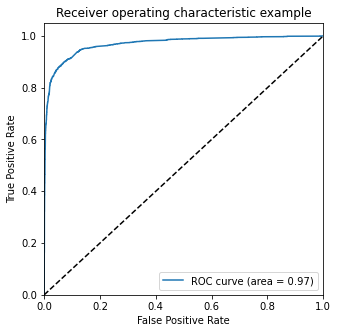

In [103]:
# Defining the function to plot the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.leads, y_train_pred_final.leads_prob)

#### The ROC of the model looks good. 

### Now calculating precision score and recall score.

In [104]:
# Precision Score

precision_score(y_train_pred_final.leads, y_train_pred_final.predicted)

0.9296675191815856

In [105]:
# Recall score.

recall_score(y_train_pred_final.leads, y_train_pred_final.predicted)

0.8641045958795562

### Making prediction on test data set with final model.

In [106]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [107]:
X_test = X_test[col]

In [108]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Country_unknown,Specialization_Hospitality Management,Specialization_Travel and Tourism,What is your current occupation_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3224,0,-0.383180,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4865,0,1.617593,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4938,0,-0.837076,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7987,0,1.982525,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1641,0,-0.893359,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [109]:
X_test_sm = sm.add_constant(X_test)

In [110]:
y_test_pred = res.predict(X_test_sm)

In [111]:
y_test_pred[:10]

3224    0.005203
4865    0.998999
4938    0.247944
7987    0.999076
1641    0.250936
7662    0.006948
4661    0.125521
1272    0.066752
1997    0.683274
6523    0.588219
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array.
y_pred_1 = pd.DataFrame(y_test_pred)

In [113]:
y_pred_1.head()

,0
3224,0.005203
4865,0.998999
4938,0.247944
7987,0.999076
1641,0.250936


In [114]:
# converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

In [115]:
y_test_df["Lead Number"] = y_test_df.index

In [116]:
# Resetting index.

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace =True)

In [117]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [118]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3224,0.005203
1,1,4865,0.998999
2,0,4938,0.247944
3,1,7987,0.999076
4,0,1641,0.250936


In [119]:
# Renamming column

y_pred_final = y_pred_final.rename(columns={0: "leads_prob"})

In [120]:
y_pred_final["final_predicted"] = y_pred_final.leads_prob.map(lambda x: 1 if x>0.5 else 0)

In [121]:
y_pred_final.head()

,Converted,Lead Number,leads_prob,final_predicted
0,0,3224,0.005203,0
1,1,4865,0.998999,1
2,0,4938,0.247944,0
3,1,7987,0.999076,1
4,0,1641,0.250936,0


#### Checking the overall accuracy.

In [122]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9331647398843931

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)

In [124]:
confusion2

array([[1657,   77],
       [ 108,  926]])

In [125]:
TP = confusion2[1,1]  # True Positive
TN = confusion2[0,0]  # True Negative
FP = confusion2[0,1]  # False Positive
FN = confusion2[1,0]  # False Negative

In [126]:
# Sensitivity.

TP/float(TP+FN)

0.8955512572533849

In [127]:
# Specificity.

TN/float(TN+FP)

0.955594002306805

### Conclusion

The model predicted the metrics of test set under good aggrement with the train set.